<a href="https://colab.research.google.com/github/sakshantG/Cardiovascular_Risk_Prediction/blob/main/Cardio_Vascular_Risk_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - **Classification**
##### **Contribution**    - **Individual**

# **Project Summary -**

**1. Data Exploration:**

a. Data Cleaning & Wrangling
b. Outliers Treatment

**2. Exploratory Data Analysis:**

a. Univariate Analysis-

i. i. Dependent Variable
ii. Categorical Variables

b. Bivariate Analysis-
i. Continuous Variables. 

ii. Categorical Variables :-
1. Which gender has most risk of CHD
2. Does smokers have risk of CHD
3. Risk of CHD to a patient on BP medication
4. Risk of CHD to a patient having hypertension
5. Risk of CHD to a diabetic patient
6. Distribution of age according to gender over TenYearCHD
7. Distribution of smokers according to gender over TenYearCHD


**3. Feature Engineering**

**3. Feature Selection**

**4. Balancing the target variable**


**5. Building models-**

a. Logistic Regression

b. Decision Tree Classifier

c. Random Forest Classifier

d. Gradient Boosting Classifier

d. K-Nearest Neighbors

e. Support Vector Classifier

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


### The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patient’s information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder

# ML Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Evaluation Metrics libraries
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load Dataset
data = pd.read_csv("/content/drive/MyDrive/data_cardiovascular_risk.csv")

### Dataset First View

In [4]:
# Dataset First Look
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
data.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
# computing number of rows
rows = len(data.axes[0])
 
# computing number of columns
cols = len(data.axes[1])
 
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  3390
Number of Columns:  17


### Dataset Information

In [7]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
data.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

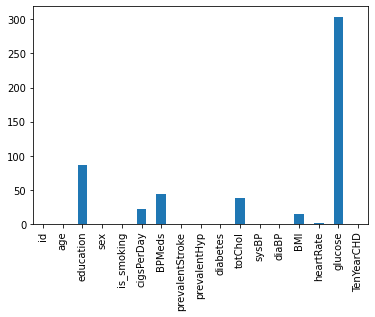

In [10]:
# Visualizing the missing values
data.isnull().sum().plot.bar()
plt.show()

### What did you know about your dataset?

Answer Here

* From above plot we can say that **Glucose** column has more null values.
* Glucose has n relation with diabetes and we will see it.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
# Dataset Describe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


### Variables Description 

Answer Here

### Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
data[data['glucose'].isnull()].head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0
10,10,61,1.0,F,NO,0.0,0.0,0,1,0,NaN,185.0,121.0,35.22,80.0,NaN,0
36,36,46,3.0,F,NO,0.0,0.0,0,0,0,193.0,106.5,70.5,26.18,75.0,NaN,0
38,38,41,2.0,F,YES,9.0,1.0,1,1,0,180.0,114.0,70.0,22.41,92.0,NaN,0
55,55,51,2.0,F,NO,0.0,0.0,0,1,0,351.0,134.0,97.5,21.66,100.0,NaN,0


In [14]:
data[data['diabetes']==0].head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [15]:
data[data['diabetes']==1].head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
77,77,63,1.0,F,NO,0.0,0.0,0,1,1,150.0,152.0,88.0,36.54,72.0,170.0,0
107,107,45,4.0,M,NO,0.0,0.0,0,0,1,189.0,132.0,78.0,28.40,75.0,177.0,0
130,130,63,1.0,M,NO,0.0,0.0,0,0,1,229.0,109.0,75.0,38.42,110.0,120.0,0
134,134,64,1.0,F,NO,0.0,0.0,0,1,1,262.0,147.0,90.0,26.51,85.0,173.0,0
173,173,58,1.0,F,NO,0.0,0.0,1,1,1,267.0,157.0,94.0,33.32,92.0,205.0,1


#### We can see non-diabetic person has glucose less than 100 whereas diabetic person has glucose above 100. Since, diabetes column do not have any null value so we will use it in filling missing values of glucose column

In [16]:
mean_glu_0 = int(data[data['diabetes']==0]['glucose'].mean())
mean_glu_0 

79

In [17]:
mean_glu_1 = int(data[data['diabetes']==1]['glucose'].mean())
mean_glu_1

171

In [18]:
# filling null values of glucose column with mean of diabetes==1
cd = data['glucose'] == 1
data['glucose'] = data['glucose'].fillna(cd.map({True:mean_glu_1, False:mean_glu_0}))

#### The other features have very few missing entries and could be dropped without losing a lot of data.

In [19]:
# dropping the other null values
data = data.dropna()

In [20]:
data.isnull().any()

id                 False
age                False
education          False
sex                False
is_smoking         False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

#### There are no any missing values present in the dataset. Also, id column is not so useful for us so droping it.

In [21]:
data = data.drop(['id', 'education'], axis=1)

In [22]:
data.dtypes

age                  int64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [23]:
# changing datatypes 
data = data.astype({'BPMeds':int, 'cigsPerDay':int})

In [24]:
cardio_df = data.rename(columns={'sex':'gender'})

In [25]:
cardio_df.head()

,age,gender,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,M,NO,0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,F,NO,0,0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [26]:
cardio_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3189.0,49.423957,8.556235,32.00,42.00,49.00,56.00,70.0
cigsPerDay,3189.0,9.098150,11.864621,0.00,0.00,0.00,20.00,70.0
BPMeds,3189.0,0.029476,0.169164,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3189.0,0.005958,0.076970,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3189.0,0.313264,0.463894,0.00,0.00,0.00,1.00,1.0
diabetes,3189.0,0.025400,0.157361,0.00,0.00,0.00,0.00,1.0
totChol,3189.0,236.968642,44.537998,113.00,206.00,234.00,264.00,600.0
sysBP,3189.0,132.436344,22.176848,83.50,117.00,128.00,143.50,295.0
diaBP,3189.0,82.841173,11.993650,48.00,74.50,82.00,89.50,142.5
BMI,3189.0,25.774569,4.132848,15.96,22.94,25.37,27.99,56.8


#### From statistical overview of the dataset, we can infer that some data features are binary, whereas other features are continuous. Further, the minimum and maximum values for some features, notably for 'totChol' and 'sysBP'. This suggests the presence of outliers in the data.

#### **Checking Outliers**

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Exploratory Data Analysis**

## **Dependent Variable**



```
# This is formatted as code
```

#### Chart - 1

## **Dependent Variable**

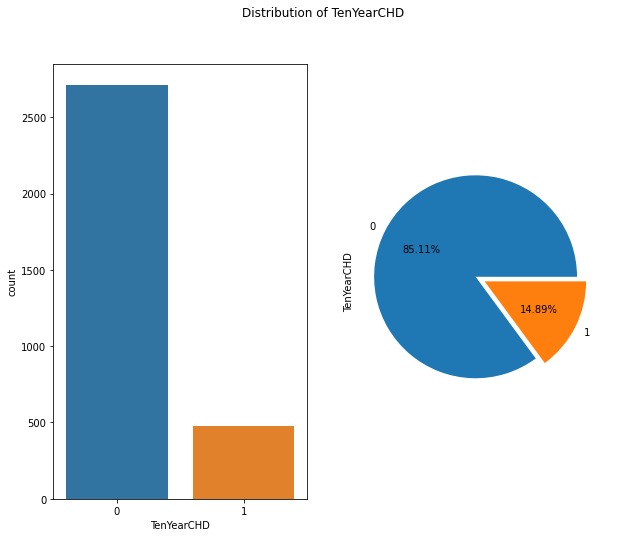

In [27]:
# Distribution of target variable
plt.subplots(figsize=(10, 8))

plt.subplot(1, 2, 1)
sns.countplot(x=cardio_df['TenYearCHD'])

plt.subplot(1, 2, 2)
cardio_df['TenYearCHD'].value_counts().plot.pie(autopct='%1.2f%%', explode=[0.1,0])

plt.suptitle("Distribution of TenYearCHD")
plt.show()

##### 1. Why did you pick the specific chart?

* Use count plot in order to see the total count of each class
* pie chart is use to see the percentage of target variables.

##### 2. What is/are the insight(s) found from the chart?

The distribution is highly imbalanced. We can see, the count of patients at risk is very less as compared to no risk patients. This would lead to class imbalance problem while fitting our models.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Above insights lead to negative growth because we can see the target variable distribution highly imbalanced.

#### Chart - 2

## **Univariate Analysis**

#### **Continuous Variable**

In [28]:
# Chart - 2 
# continuous variables
cont_var= ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']


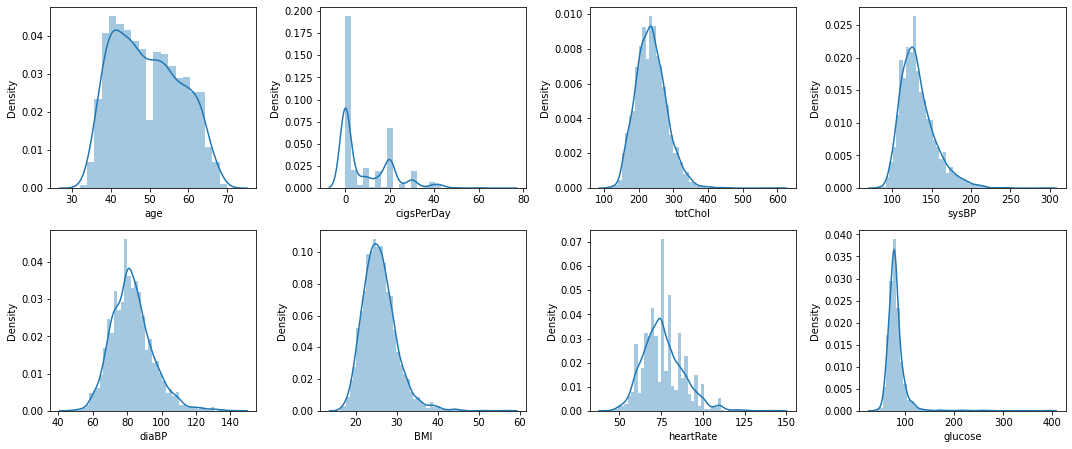

In [29]:
# check distribution
def check_dist(df):
    l = df.columns.values
    number_of_columns=(len(l))/2
    number_of_rows = 2
    
    plt.figure(figsize=(15,9))
    for i in range(1,len(l)+1):
        plt.subplot(number_of_rows+1,number_of_columns,i)
        sns.distplot(df[l[i-1]],kde=True) 
        plt.tight_layout()
        
check_dist(cardio_df[cont_var])

##### 1. Why did you pick the specific chart?

* Above distribution plot is used because it represents the overall distribution of continuous data variables. 

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

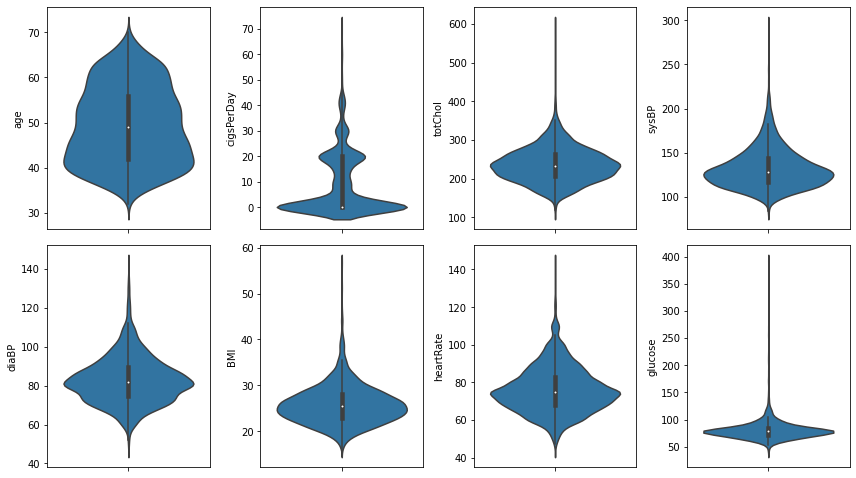

In [30]:
# Chart - 3 

# violinplot
l = cardio_df[cont_var].columns.values
number_of_columns=(len(l))/2
number_of_rows = 2

plt.figure(figsize=(12,10))
for i in range(1,len(l)+1):
    plt.subplot(number_of_rows+1,number_of_columns,i)
    sns.violinplot(y=cardio_df[cont_var][l[i-1]])
    plt.tight_layout()

##### 1. Why did you pick the specific chart?

* violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data.
* violin plots depict summary statistics and the density of each variable

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

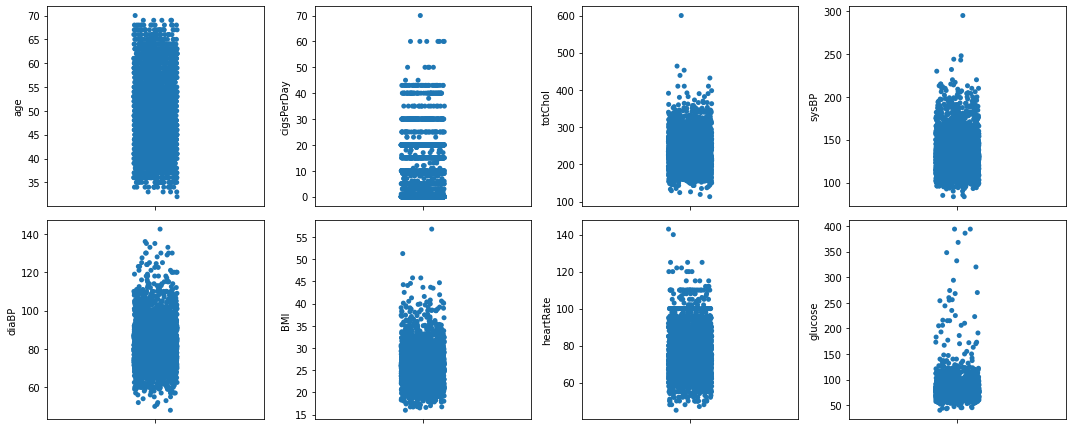

In [31]:
# Chart - 4 
# stripplot
l = cardio_df[cont_var].columns.values
number_of_columns=(len(l))/2
number_of_rows = 2

plt.figure(figsize=(15,9))
for i in range(1,len(l)+1):
    plt.subplot(number_of_rows+1,number_of_columns,i)
    sns.stripplot(y=cardio_df[cont_var][l[i-1]]) 
    plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [32]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 1 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3189 non-null   int64  
 1   gender           3189 non-null   object 
 2   is_smoking       3189 non-null   object 
 3   cigsPerDay       3189 non-null   int64  
 4   BPMeds           3189 non-null   int64  
 5   prevalentStroke  3189 non-null   int64  
 6   prevalentHyp     3189 non-null   int64  
 7   diabetes         3189 non-null   int64  
 8   totChol          3189 non-null   float64
 9   sysBP            3189 non-null   float64
 10  diaBP            3189 non-null   float64
 11  BMI              3189 non-null   float64
 12  heartRate        3189 non-null   float64
 13  glucose          3189 non-null   float64
 14  TenYearCHD       3189 non-null   int64  
dtypes: float64(6), int64(7), object(2)
memory usage: 527.7+ KB


In [33]:
# Chart - 5
# categorical variable or binary vairable
cat_var = ['gender','is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [34]:
# unique values
for col in cardio_df[cat_var]:
  unq = cardio_df[col].unique()
  print("unique value in", col,":", unq)


unique value in gender : ['M' 'F']
unique value in is_smoking : ['NO' 'YES']
unique value in BPMeds : [0 1]
unique value in prevalentStroke : [0 1]
unique value in prevalentHyp : [1 0]
unique value in diabetes : [0 1]


In [35]:
# unique values
for col in cardio_df[cat_var]:
  print(f"{col}")
  print(cardio_df[col].value_counts())
  print("-"*30)


gender
F    1796
M    1393
Name: gender, dtype: int64
------------------------------
is_smoking
NO     1610
YES    1579
Name: is_smoking, dtype: int64
------------------------------
BPMeds
0    3095
1      94
Name: BPMeds, dtype: int64
------------------------------
prevalentStroke
0    3170
1      19
Name: prevalentStroke, dtype: int64
------------------------------
prevalentHyp
0    2190
1     999
Name: prevalentHyp, dtype: int64
------------------------------
diabetes
0    3108
1      81
Name: diabetes, dtype: int64
------------------------------


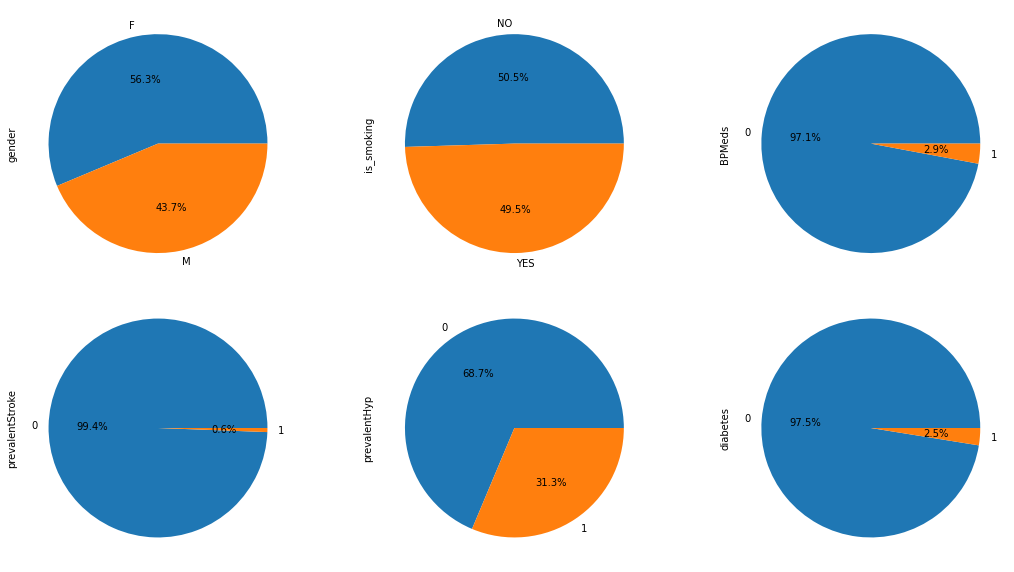

In [36]:
# pie chart 

l = cardio_df[cat_var].columns.values
number_of_columns=(len(l))/2
number_of_rows = 2

plt.figure(figsize=(15,12))
for i in range(1,len(l)+1):
    plt.subplot(number_of_rows+1,number_of_columns,i)
    cardio_df[cat_var][l[i-1]].value_counts().plot.pie(autopct= '%1.1f%%') 
    plt.tight_layout()

##### 1. Why did you pick the specific chart?

* Here pie chart is used in order to see how individual categorical variable is contibuting in predicting target varaible.

##### 2. What is/are the insight(s) found from the chart?

**BPMeds**, **prevalentStroke** and **diabetes** are **highly imbalanced**. This feature will not have much contribution in predicting target variable.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, above insight help creating a positive business impact.
* some of the variables like **gender**, **is_smoking**, and **prevalentHyp** helps predicting target variable.

#### Chart - 6

## **Bivariate Analysis**

### **Continuous Variables**

In [37]:
len(cont_var)

8

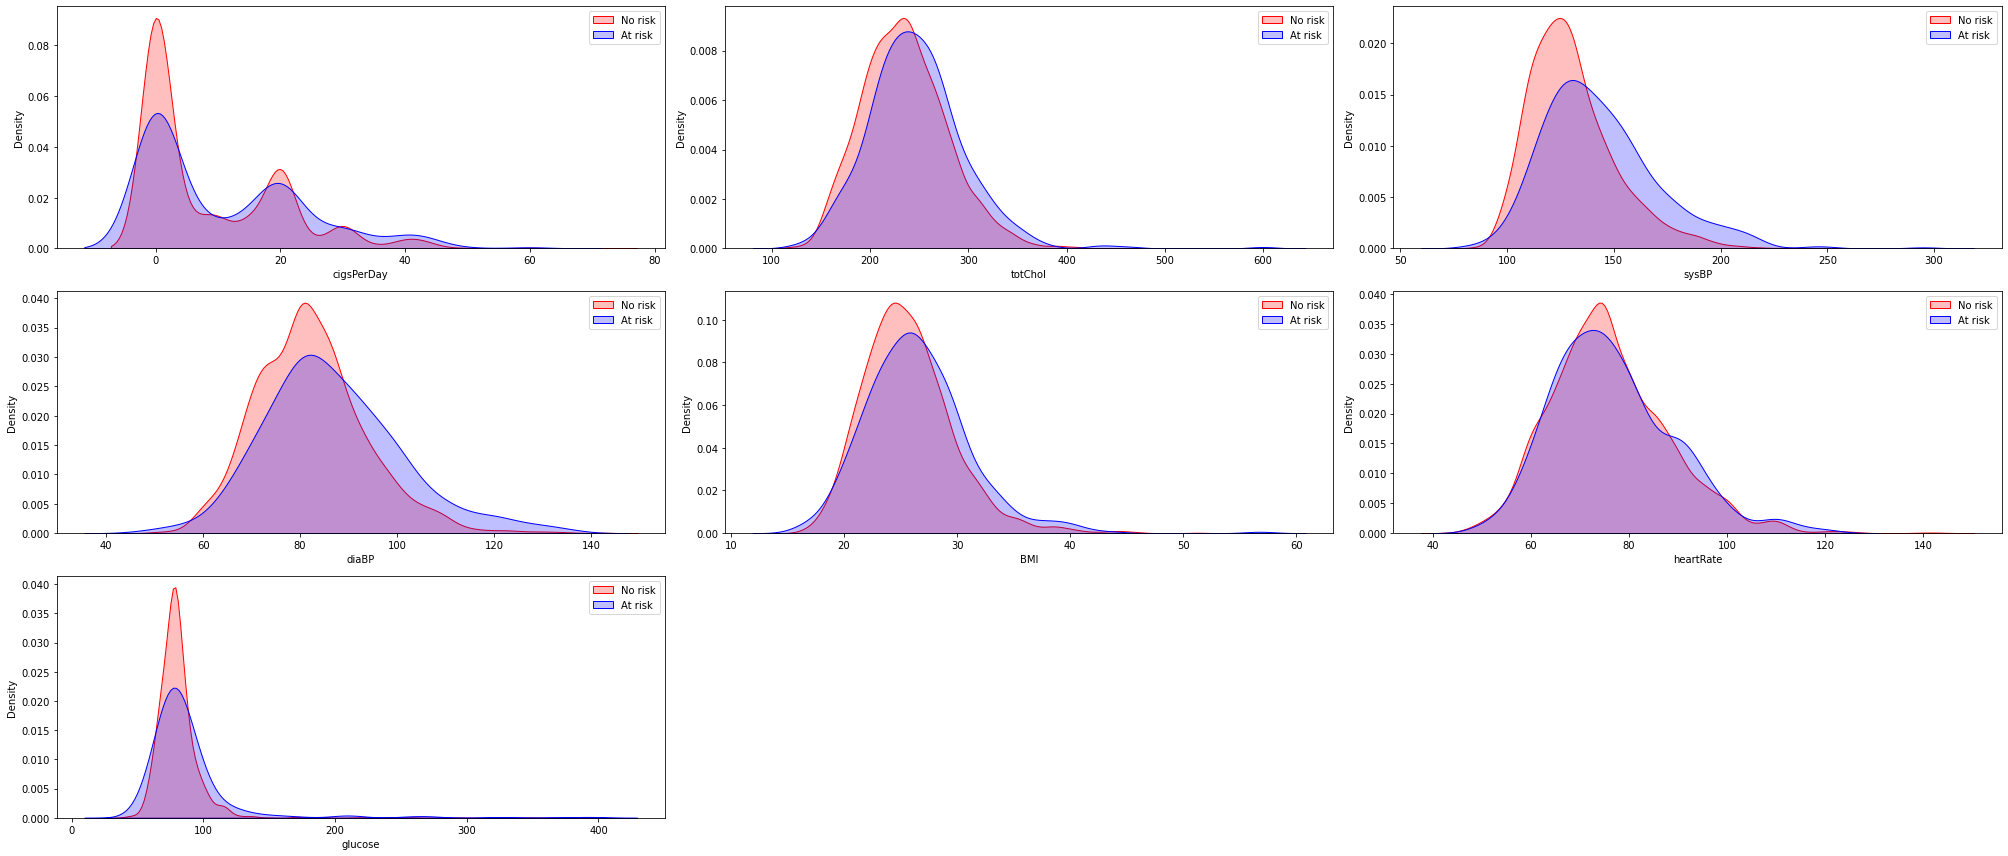

In [38]:
#chart -6 
# Which continuous variables are risk factors
l = cont_var
number_of_columns=(len(l)-1)/2
number_of_rows = 2

plt.figure(figsize=(8*number_of_columns,6*number_of_rows))

# Generate bivariate KDE plots for all combinations of continuous variables
for i in range(1,len(l)):
    plt.subplot(number_of_rows+1,number_of_columns,i)
    fig = sns.kdeplot(cardio_df[l[i]][cardio_df['TenYearCHD'] == 0], shade=True, color="r", label='No risk')
    fig = sns.kdeplot(cardio_df[l[i]][cardio_df['TenYearCHD'] == 1], shade=True, color="b",label='At risk')
    plt.legend()
    plt.tight_layout()

##### 1. Why did you pick the specific chart?

used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable.

##### 2. What is/are the insight(s) found from the chart?

* There is no direct correlation of coronary heart disease with the BMI, heartrate and glucose.
* Patients at risk have a slight increase in cholesterol
* Patients having higher sysBP and DiaBP tends to have high risk of Coronary heart disease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

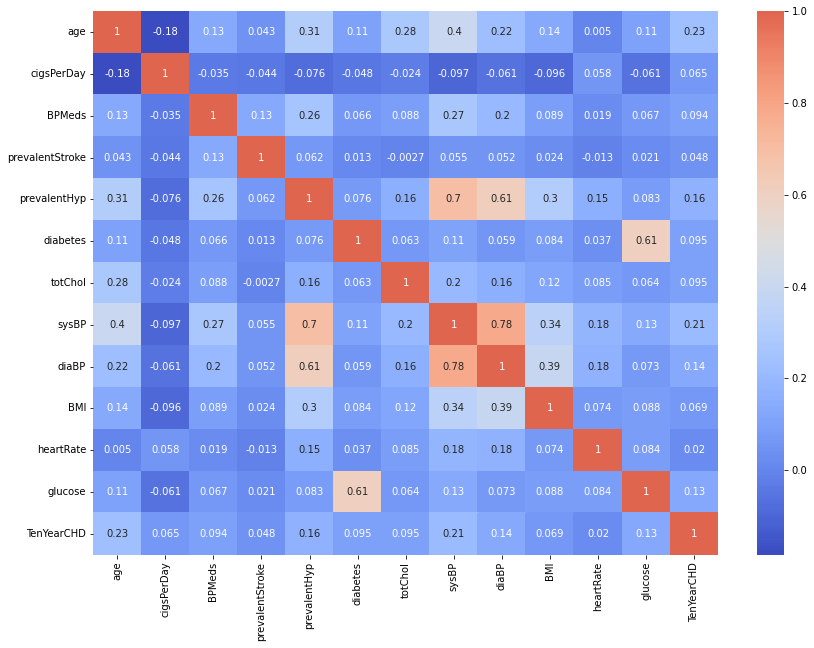

In [39]:
# Chart - 7 

fig,axes = plt.subplots(1,1,figsize=(14,10))
sns.heatmap(cardio_df.corr(), annot =True, cmap='coolwarm', ax= axes, center=0.5)
plt.show()

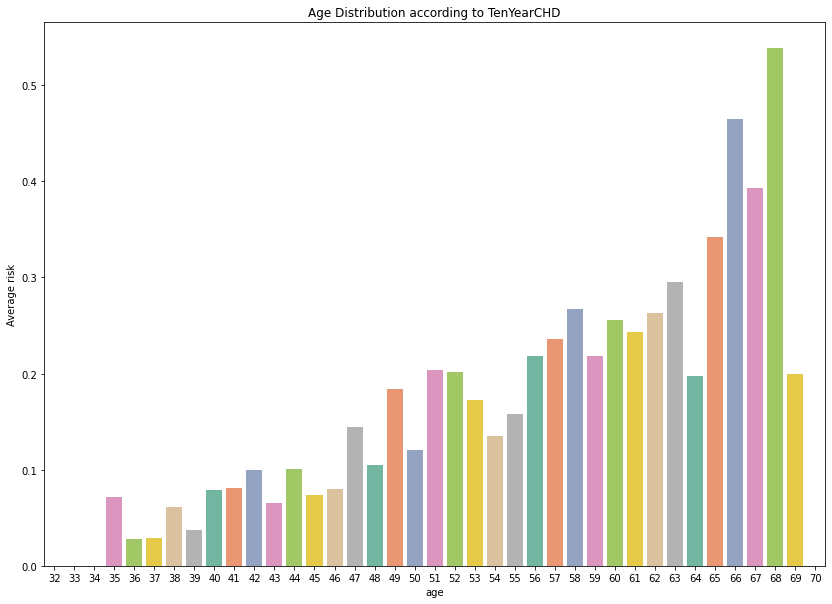

In [40]:
# which age has most risk
risk_age = cardio_df.groupby("age", as_index=False)['TenYearCHD'].mean()

fig,ax = plt.subplots(figsize=(14,10))
ax= sns.barplot(x="age", y="TenYearCHD", data=risk_age, palette='Set2')
ax.set_title("Age Distribution according to TenYearCHD")
plt.ylabel("Average risk")
plt.show()


##### 1. Why did you pick the specific chart?

* Bar plot is used to compare between values of different categories in the data
* when you want to show a distribution of data points or perform a comparison of metric values across different subgroups of your data. 
* From a bar chart, we can see which groups are highest or most common, and how other groups compare against the others.

##### 2. What is/are the insight(s) found from the chart?

The average of diseased patients increases with increasing age. **The peoples of age above 55 have high risk of contracting disease** and the risk increases with age.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the above gained insights help creating a positive impact by identifying how different different age groups are affecting by cardio vascular risk.

#### Chart - 8

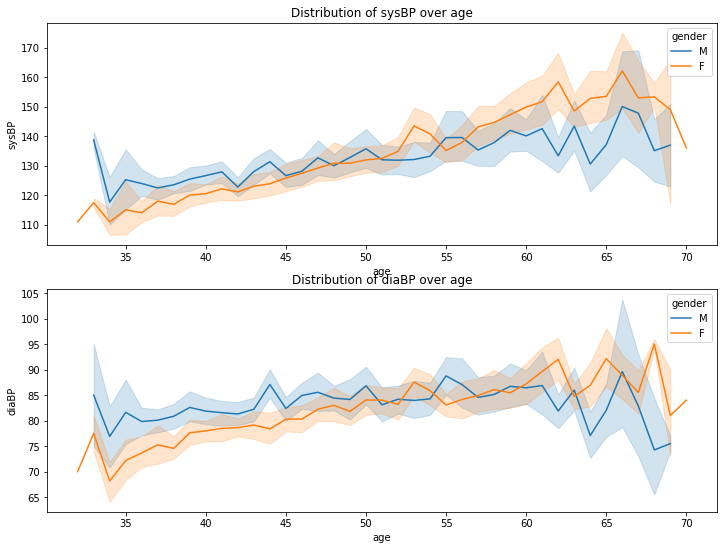

In [41]:
# Chart - 8 
# Distribution of sysBP and diaBP over age in relation to gender

plt.subplots(figsize=(12,9))

plt.subplot(2,1,1)
sns.lineplot(data=cardio_df, x="age", y="sysBP", hue="gender")
plt.title("Distribution of sysBP over age")

plt.subplot(2,1,2)
sns.lineplot(data=cardio_df, x="age", y="diaBP", hue="gender")
plt.title("Distribution of diaBP over age")

plt.show()

##### 1. Why did you pick the specific chart?

lineplot() function to represent the multi data variable relationships with a varying size of line to be plotted.

##### 2. What is/are the insight(s) found from the chart?

Womens of above 50 age have higher systolic BP as compared to men thus increasing risk of disease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, above insight help predicting the gender wise cardio risk.

#### Chart - 9

## **Categorical Variables**

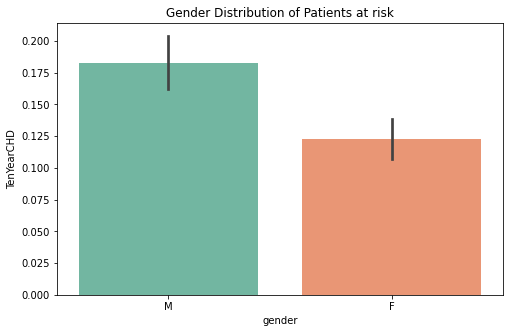

In [42]:
# Chart - 9 
# which gender has most risk

fig,ax = plt.subplots(figsize=(8,5))

ax = sns.barplot(x='gender', y='TenYearCHD', data=cardio_df, palette='Set2')
ax.set_title("Gender Distribution of Patients at risk")
plt.show()

##### 1. Why did you pick the specific chart?

* Bar plot is used to compare between values of different categories in the data
* when you want to show a distribution of data points or perform a comparison of metric values across different subgroups of your data

##### 2. What is/are the insight(s) found from the chart?

According to this dataset, Men have higher risk of Contracting coronary heart disease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

above insight leads to neagtive growth, because this might leads to severe cause in male dominancy. 

#### Chart - 10

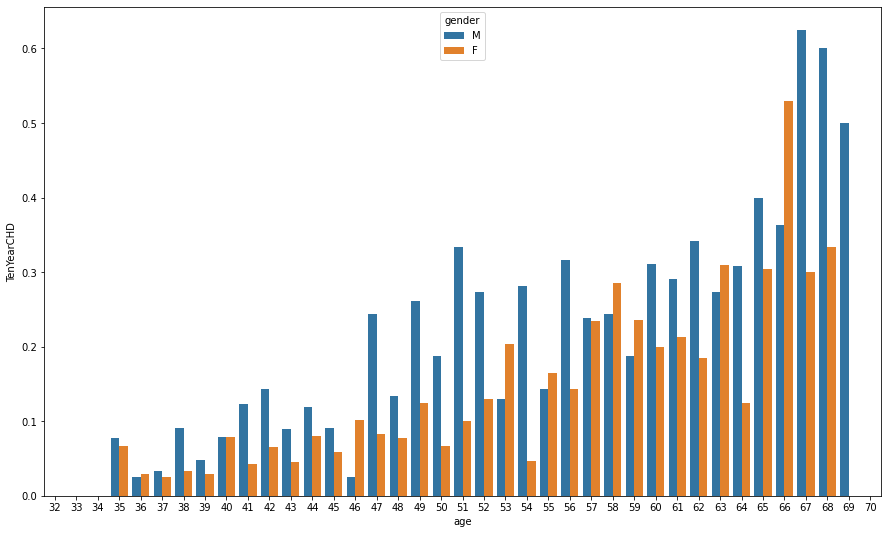

In [43]:
# Chart - 10
# distribution of age according to gender over TenYearCHD

plt.figure(figsize=(15,9))
sns.barplot(x="age", y="TenYearCHD", data=cardio_df, hue="gender", ci=None)
plt.show()

##### 1. Why did you pick the specific chart?

* Bar plot is used to compare between values of different categories in the data

##### 2. What is/are the insight(s) found from the chart?

* From above we can conclude **Male** class has high risk as compared to **Female**
* From age 45 there is continous increase in cardio vascular risk.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, if we consider medical treatment its creating positive impact, that it leads to more engagment of Doctors and medical euipment.
But considering Health perspecting its creating negative impact on human being life

#### Chart - 11

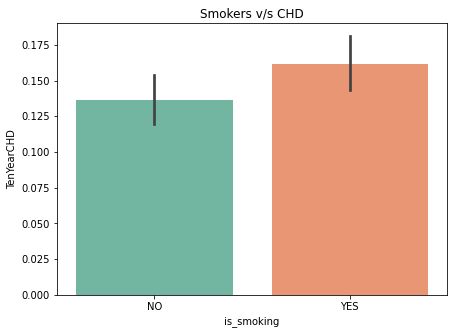

In [44]:
# Does smokers have risk of CHD
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.barplot(x='is_smoking',y='TenYearCHD', data=cardio_df, palette='Set2')
ax.set_title("Smokers v/s CHD")
plt.show()

##### 1. Why did you pick the specific chart?

* Used bar plot to compare smoker vs cardio vasular disease
* Bar plot is used to compare between values of different categories in the data

##### 2. What is/are the insight(s) found from the chart?

* From above we can conclude that **Current smokers have high risk** of contracting coronary heart disease than non smokers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No, above plot doesn't create posittive impact, as more smoking leads to more risk

#### Chart - 12

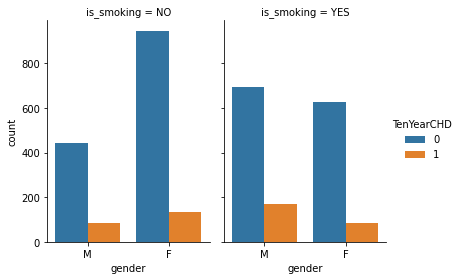

In [45]:
# Distribution of smokers according to gender over TenYearCHD

sns.catplot(x="gender", hue="TenYearCHD", col="is_smoking",
                data=cardio_df, kind="count", height=4, aspect=.7)
plt.show()

##### 1. Why did you pick the specific chart?

* above Stacked bar plot is drawn to show risk of gender wise smokers v/s CHD  

##### 2. What is/are the insight(s) found from the chart?

* There are more male smokers than females. Thus, male have higher risk of contracting coronary heart diease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No, above plot dosen't show any positive business impact.

#### Chart - 13

### **Binary Variables**

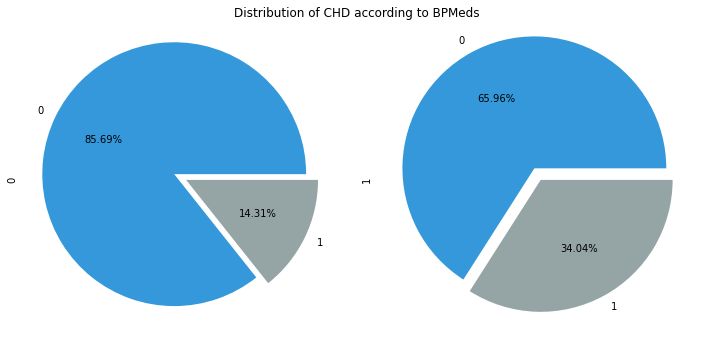

In [46]:
# Chart - 13 
# Risk of CHD to a patients on BPMedds
bp_med = cardio_df.groupby(['BPMeds','TenYearCHD']).size().reset_index().pivot(
                            columns='BPMeds', index='TenYearCHD', values=0)
colors= ["#3498db", "#95a5a6"]
bp_med.plot(kind='pie', subplots=True, figsize=(10,5), colors=colors,
            autopct='%.2f%%', explode=[0.1,0], legend=False)

plt.suptitle("Distribution of CHD according to BPMeds")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* Here pie chart is used in order to see how individual categorical variable is contibuting in predicting target varaible.

##### 2. What is/are the insight(s) found from the chart?

* The risk of getting Coronary Heart Disease for a patient on BP medication is 34% whereas, a patient having no BP medication has only 14% of risk.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No, the above plot is not creating positive impact because it showning increse in risk of coronary cardio disease.

### Chart- 14

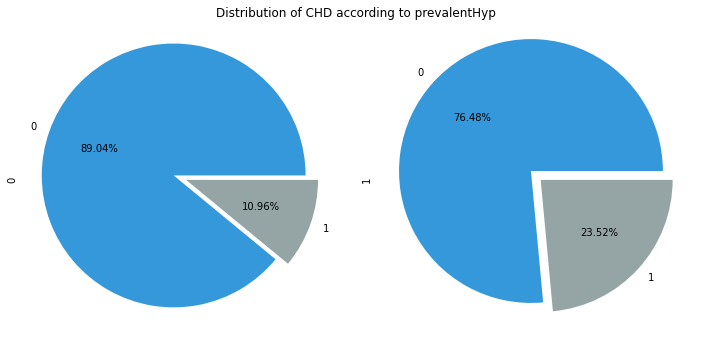

In [47]:
# chart- 14
# Risk of CHD to a patients on Prevalent Hyper-tensioon
bp_med = cardio_df.groupby(['prevalentHyp','TenYearCHD']).size().reset_index().pivot(
                            columns='prevalentHyp', index='TenYearCHD', values=0)
colors= ["#3498db", "#95a5a6"]
bp_med.plot(kind='pie', subplots=True, figsize=(10,5), colors=colors,
            autopct='%.2f%%', explode=[0.1,0], legend=False)

plt.suptitle("Distribution of CHD according to prevalentHyp")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* above pie chart is used to show the percentage distributio of Chronic cardiac risk with respect to Hyperttension

##### 2. What is/are the insight(s) found from the chart?

If a patient is hypertensive then the risk of contracting Coronary Heart Disease is 37% whereas, a patient with no hypertension has only 10% of risk.

### Chart - 15

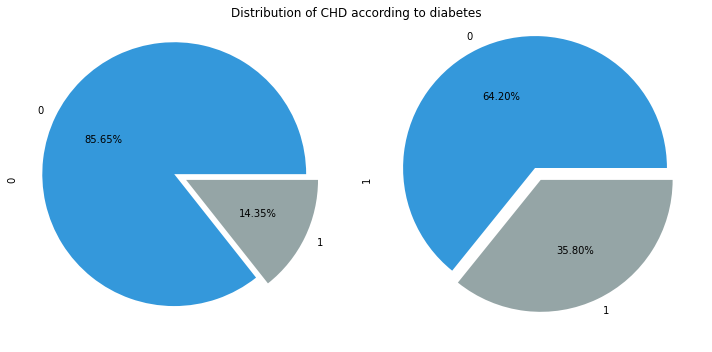

In [48]:
# Chart - 15
# Risk of CHD to a diabetic patients
bp_med = cardio_df.groupby(['diabetes','TenYearCHD']).size().reset_index().pivot(
                            columns='diabetes', index='TenYearCHD', values=0)
colors= ["#3498db", "#95a5a6"]
bp_med.plot(kind='pie', subplots=True, figsize=(10,5), colors=colors,
            autopct='%.2f%%', explode=[0.1,0], legend=False)

plt.suptitle("Distribution of CHD according to diabetes")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* above pie chart is used to show the percentage distributio of Chronic cardiac risk with respect to Diabetes

##### 2. What is/are the insight(s) found from the chart?

The risk of getting Coronary Heart Disease to a diabetic patient is 35% whereas, non-diabetic patient has only 14% of risk.

#### Chart - 14 - Correlation Heatmap

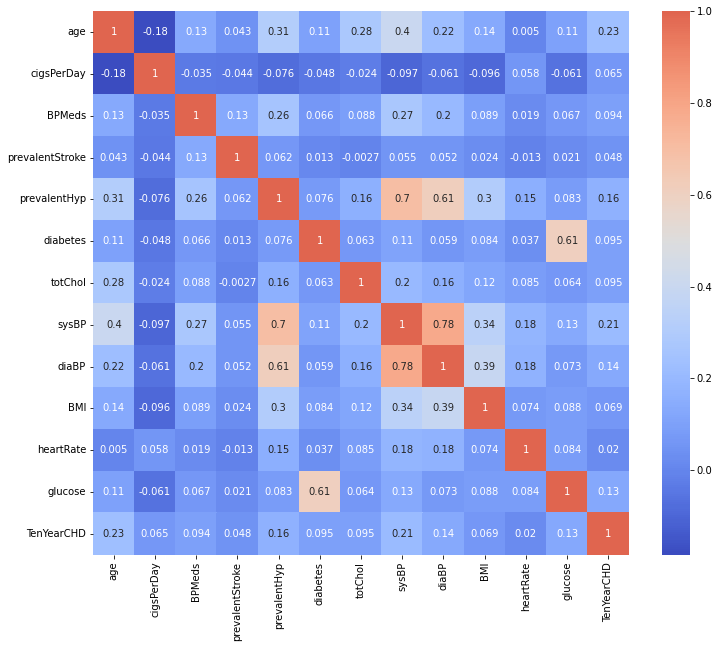

In [49]:
# Correlation Heatmap visualization code
fig, axes = plt.subplots(1,1,figsize=(12,10))
sns.heatmap(cardio_df.corr(), annot=True, cmap='coolwarm', ax=axes, center=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

* Above Heatmap is used in order to see the correlation between independent variables.

##### 2. What is/are the insight(s) found from the chart?

* sysBP and PrevalentHyp these two variables are showing strong correlation.
* diBP and PrevalentHyp these two variables also showing strong correlation.
* and variable glucose and diabetes has positive correlation.

#### Chart - 15 - Pair Plot 

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [50]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [51]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [52]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [53]:
# Handling Missing Values & Missing Value Imputation
cardio_df.isnull().sum()

age                0
gender             0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

* We do not have any missing values to we do not need to perform any missing value imputation

### 2. Handling Outliers

In [54]:
cardio_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3189.0,49.423957,8.556235,32.00,42.00,49.00,56.00,70.0
cigsPerDay,3189.0,9.098150,11.864621,0.00,0.00,0.00,20.00,70.0
BPMeds,3189.0,0.029476,0.169164,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3189.0,0.005958,0.076970,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3189.0,0.313264,0.463894,0.00,0.00,0.00,1.00,1.0
diabetes,3189.0,0.025400,0.157361,0.00,0.00,0.00,0.00,1.0
totChol,3189.0,236.968642,44.537998,113.00,206.00,234.00,264.00,600.0
sysBP,3189.0,132.436344,22.176848,83.50,117.00,128.00,143.50,295.0
diaBP,3189.0,82.841173,11.993650,48.00,74.50,82.00,89.50,142.5
BMI,3189.0,25.774569,4.132848,15.96,22.94,25.37,27.99,56.8


From statistical overview of the dataset, we infer that some data features are binary, whereas other features are continuous. Further, the minimum and maximum values for some features, notably for 'totChol' and 'sysBP'. This suggests the presence of outliers in the data.

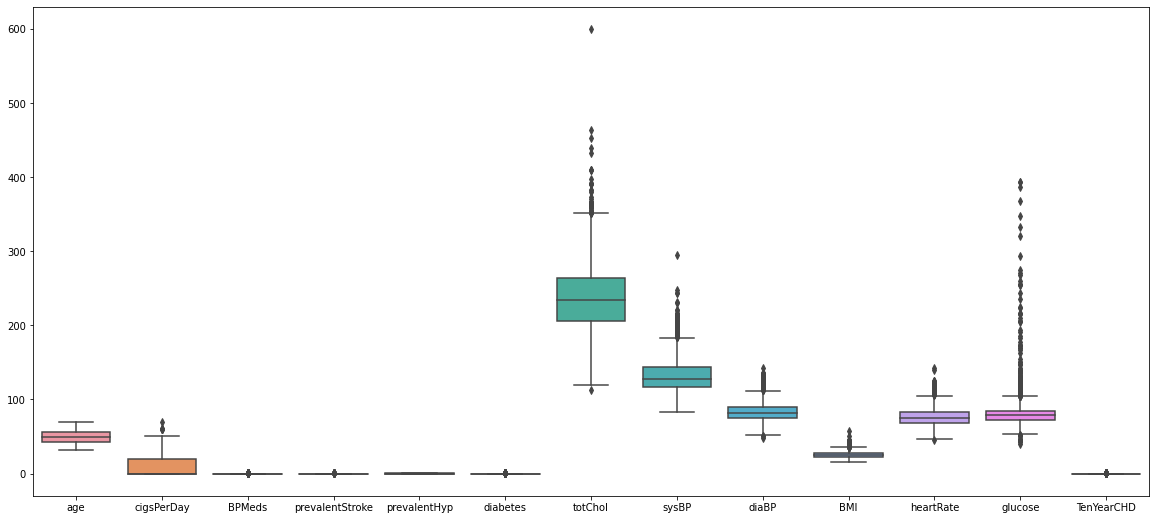

In [55]:
# Handling Outliers & Outlier treatments

plt.figure(figsize=(20,9))
sns.boxplot(data=cardio_df)
plt.show()

In [56]:
# droping outliers from totChol column above 500
cardio_df= cardio_df.drop(cardio_df[cardio_df['totChol']>500].index)

In [57]:
# droping outliers from sysBP column above 250
cardio_df=cardio_df.drop(cardio_df[cardio_df['sysBP']>250].index)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [58]:
# Encode your categorical columns
# Converting categorical columns to Numeric data

cardio_df['gender'] = cardio_df['gender'].apply(lambda x : 1 if x=='M' else 0)
cardio_df['is_smoking'] = cardio_df['is_smoking'].apply(lambda x : 1 if x== 'YES' else 0)

In [59]:
cardio_df.head()

,age,gender,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,1,0,0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,0,0,0,0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


#### What all categorical encoding techniques have you used & why did you use those techniques?

* In gender column replace Male - 1 and Female - 0
* and in smoking column replace YES- 1 and NO - 0

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [60]:
# Expand Contraction

#### 2. Lower Casing

In [61]:
# Lower Casing

#### 3. Removing Punctuations

In [62]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [63]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [64]:
# Remove Stopwords

In [65]:
# Remove White spaces

#### 6. Rephrase Text

In [66]:
# Rephrase Text

#### 7. Tokenization

In [67]:
# Tokenization

#### 8. Text Normalization

In [68]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [69]:
# POS Taging

#### 10. Text Vectorization

In [70]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [71]:
# Manipulate Features to minimize feature correlation and create new features


#### 2. Feature Selection

Feature selection is a way of selecting the subset of the most relevant features from the original features set by removing the redundant, irrelevant, or noisy features.

#### **SelectKBest Method to select top most important feature**

In [72]:
# spliting features and target variable]
X = cardio_df.drop("TenYearCHD", axis=1)
y = cardio_df["TenYearCHD"]

In [73]:
# importing library "SelectKBest" for feature selection
from sklearn.feature_selection import SelectKBest, chi2

In [74]:
# Select your features wisely to avoid overfitting
selector = SelectKBest(chi2, k=10)
model_fit = selector.fit(X,y)
best_features = list(X.columns[selector.get_support(indices=True)])
print(best_features)

['age', 'gender', 'cigsPerDay', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'glucose']


In [75]:
features_scores = pd.DataFrame(columns=['feature','score'])
features_scores['feature'] = X.columns
features_scores['score'] = model_fit.scores_
print(features_scores.nlargest(11,'score')) 

         feature       score
9          sysBP  496.009964
13       glucose  342.530405
0            age  247.589491
3     cigsPerDay  216.430560
8        totChol  208.602928
10         diaBP   98.097285
6   prevalentHyp   57.377337
4         BPMeds   27.420105
7       diabetes   25.721582
1         gender   12.684687
11           BMI    9.418666


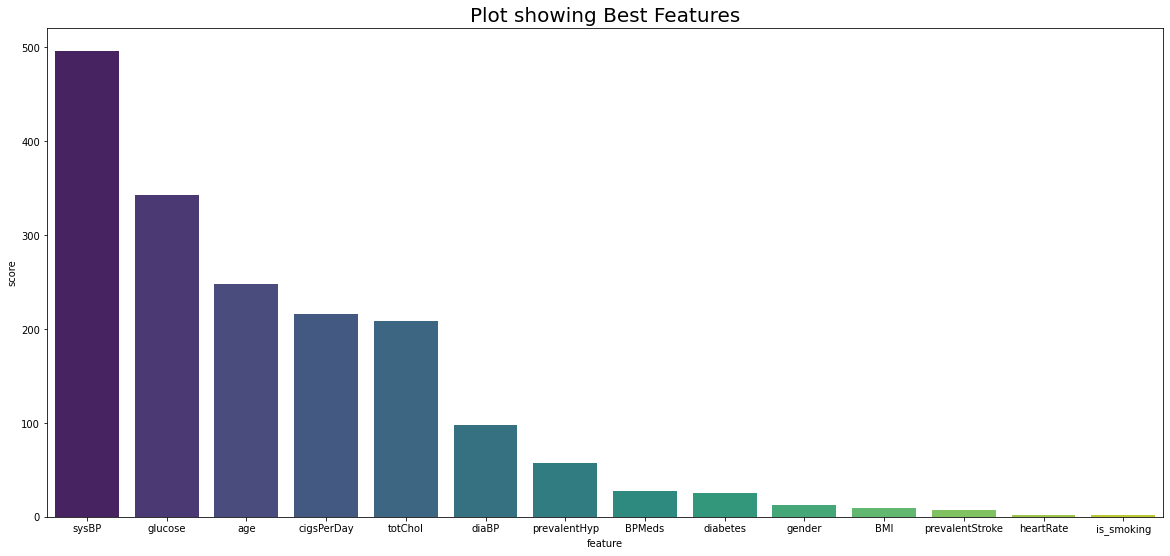

In [76]:
# Visualising best selected feature

features_scores=features_scores.sort_values(by="score", ascending=False)
plt.figure(figsize=(20,9), facecolor='w')
sns.barplot(x='feature',y='score', data=features_scores, palette='viridis')
plt.title("Plot showing Best Features", size=20)
plt.show()

droping 'BPMeds' and 'diabetes' features as we saw they are highly imbalanced so we will select only 8 features from top 10 features

**Selecting best 8 features**

In [77]:
cardio_df = cardio_df[['age', 'gender', 'cigsPerDay', 'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'glucose', "TenYearCHD"]]
cardio_df.head()

,age,gender,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,glucose,TenYearCHD
1,36,1,0,1,212.0,168.0,98.0,75.0,0
2,46,0,10,0,250.0,116.0,71.0,94.0,0
3,50,1,20,1,233.0,158.0,88.0,94.0,1
4,64,0,30,0,241.0,136.5,85.0,77.0,0
5,61,0,0,1,272.0,182.0,121.0,65.0,1


##### What all feature selection methods have you used  and why?

* Above uses SelectKBest feature seleaction method in order to select best features from the dataset.
* SelectKBest can be used to identify the most important features, which can then be further engineered to improve the performance of the model. 

##### Which all features you found important and why?

* Features like **age, gender, cigsPerDay, BPMeds, prevalentHyp, diabetes, totChol, sysBP, diaBP, glucose** are found to be best features.
* By appyling the metod of **SelectKBest** above features are foun  with the highest scores.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [78]:
# Transform Your data

##### Which method have you used to scale you data and why?

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [79]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 7. Handling Imbalanced Dataset

Class 0 : 2714
Count 1 : 473
proportion_0 : 85.16
proportion_1 : 14.84


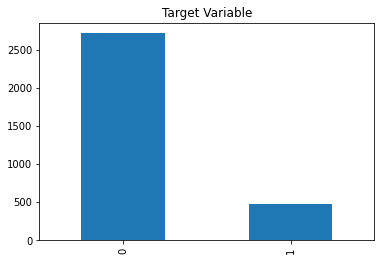

In [80]:
# class count to see ow imbalanced the data is.
count_class_0, count_class_1 = cardio_df['TenYearCHD'].value_counts()

print('Class 0 :', count_class_0)
print('Count 1 :', count_class_1)
print('proportion_0 :', round((count_class_0/(count_class_1 + count_class_0))*100, 2))
print('proportion_1 :', round((count_class_1/(count_class_0 + count_class_1))*100, 2))

cardio_df['TenYearCHD'].value_counts().plot(kind ='bar', title='Target Variable')
plt.show()



##### Do you think the dataset is imbalanced? Explain Why.

* Yes, the target variable is imbalanced 
* Above we can see the class 0 has **85.16%** proportion which is more as compared to class 1 has proportion **14.84%** in target variable 'TenYearCHD'.

In [81]:
# Handling Imbalanced Dataset (If needed)
# Divide by class

df_class_0 = cardio_df[cardio_df['TenYearCHD']== 0]
df_class_1 = cardio_df[cardio_df['TenYearCHD']== 1]

### **Random Over-Sampling**

In [82]:
# Random Over-Sampling
class_1_over = df_class_1.sample(count_class_0, replace=True)
cardio_df = pd.concat([df_class_0, class_1_over], axis=0)

Random Over-Sampling
0    2714
1    2714
Name: TenYearCHD, dtype: int64


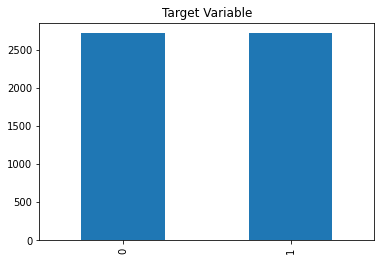

In [83]:
print('Random Over-Sampling')
print(cardio_df['TenYearCHD'].value_counts())

cardio_df['TenYearCHD'].value_counts().plot(kind='bar', title='Target Variable')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

* Here Over-sampling technique is used to balanced the dataset.
* If undersampling has done we would have lose some important imformation. So, in order to prevent that, Over-sampling method is used.

### 8. Data Splitting

In [84]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

In [85]:
X = cardio_df.iloc[:,:-1]
y = cardio_df['TenYearCHD']

In [86]:
# splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0, stratify=y )

##### What data splitting ratio have you used and why? 

* Split the data is 75:25 
* 75% - Train dataset and 25% - Test dataset

### 9. Data Scaling

In [87]:
# Scaling data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## ***7. ML Model Implementation***

### **Defining Functions**

In [90]:
# Creating function to calculate evaluation metrics

results = {}

def evaluation_metrics(y_test_, y_pred_, model=None):

  ''' Take actual target values(.i.e. y_test) and predicted target values(y_pred)
      as input and return Evaluation metrics as output ''' 
  
  print("Evaluation Metrics on test data:")
  
  # accuracy score
  acc = accuracy_score(y_test_, y_pred_)
  print(f"Accuracy Score : {acc}")

  # Precision score
  precision = precision_score(y_test_, y_pred_)
  print(f"Precision Score : {precision}")

  # recall score
  recall = recall_score(y_test_, y_pred_)
  print(f"Recall Score : {recall}")

  # F1 Score
  f1 = f1_score(y_test_, y_pred_)
  print(f"F1 Score : {f1}")

  # appending results into dictionary
  results[model] = [acc,precision,recall,f1]

In [93]:
# function to plot roc curve

def plot_roc_curve(y_test_, y_pred_):

  ''' 
  This function computes and plots the receiver operating characteristic curve, or ROC curve.
  '''

  fpr, tpr, threshold = roc_curve(y_test_,y_pred_)
  roc_auc_scr = roc_auc_score(y_test_, y_pred_)

  # printing AUC score
  print(f"ROC-AUC Score : {roc_auc_scr}")

  # plotting the ROC curve
   
  plt.figure(figsize=(8,6))
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_scr)

  plt.plot([0,1], [0,1], color='red', linestyle='--')

  plt.xticks(np.arange(0.0, 1.1, step=0.1))
  plt.xlabel("False Positive Rate", fontsize=15)

  plt.yticks(np.arange(0.0, 1.1, step=0.1))
  plt.ylabel("True Positive Rate", fontsize=15)

  plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
  plt.legend(prop={'size':13}, loc='lower right')

  plt.show()

In [94]:
# function to plot feature importance

def plot_feature_importance(model,X):

  ''' plots feature importance graph '''


  importances = list(model.feature_importances_)

  feature_importances= {'feature':list(X.columns), 'feature_importance':importances}

  importance_df= pd.DataFrame(feature_importances)
  importance_df.sort_values(by='feature_importance', ascending=False, inplace=True)

  plt.figure(figsize=(12,6))
  sns.barplot(x='feature_importance', y='feature', data=importance_df)
  
  plt.xlabel("Importance")
  model_name= model.__class__.__name__
  plt.title(f"Feature Importance {model_name}",fontweight='bold', fontsize=15)
  plt.tight_layout()

  plt.show()

### ML Model - 1 

## **Logistic Regression**

In [95]:
# ML Model - 1 Implementation
# creating logistic regression model
clf = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Fit the Algorithm
lr_clf = clf.fit(X_train, y_train)

# Predict on the model
train_pred_lr = lr_clf.predict(X_train)
test_pred_lr = lr_clf.predict(X_test)

In [96]:
# Predicting probability
test_proba_lr = lr_clf.predict_proba(X_test)[:,1]

In [97]:
# train set accuracy score
accuracy_score(y_train,train_pred_lr)

0.6671579464505035

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### **Model Evaluation**

In [98]:
# Evaluation Metrics
evaluation_metrics(y_test, test_pred_lr, "Logisitic Regression")


Evaluation Metrics on test data:
Accuracy Score : 0.686072218128224
Precision Score : 0.6815561959654178
Recall Score : 0.6976401179941003
F1 Score : 0.6895043731778425


#### **Confusion Matrix**

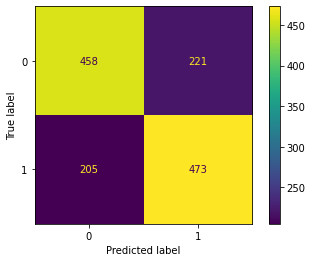

In [99]:
# visualizing confusion matrix
plot_confusion_matrix(lr_clf, X_test, y_test)
plt.show()

#### **AUC-ROC Curve**

ROC-AUC Score : 0.7413144438507088


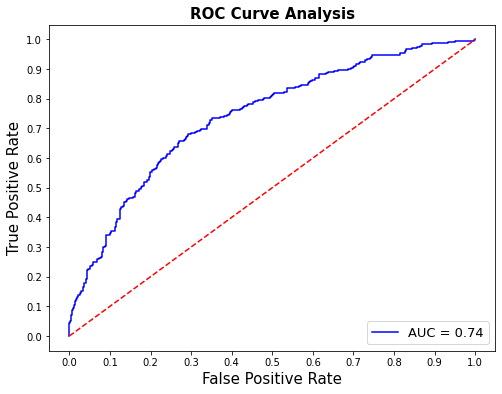

In [100]:
plot_roc_curve(y_test, test_proba_lr)

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***